In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [36]:
samples = np.random.rand(5000)*10

In [37]:
points = np.random.rand(5000)*0.5

In [38]:
thetas = np.linspace(0,10,1000)
gauss = st.norm(loc=5,scale=1).pdf(thetas)

In [39]:
accept = []
reject = []
for i in range(len(samples)):
    if st.norm(loc=5,scale=1).pdf(samples[i]) > points[i]:
        accept.append((samples[i],points[i]))
    else:
        reject.append((samples[i],points[i]))
accept = np.array(accept)
reject = np.array(reject)

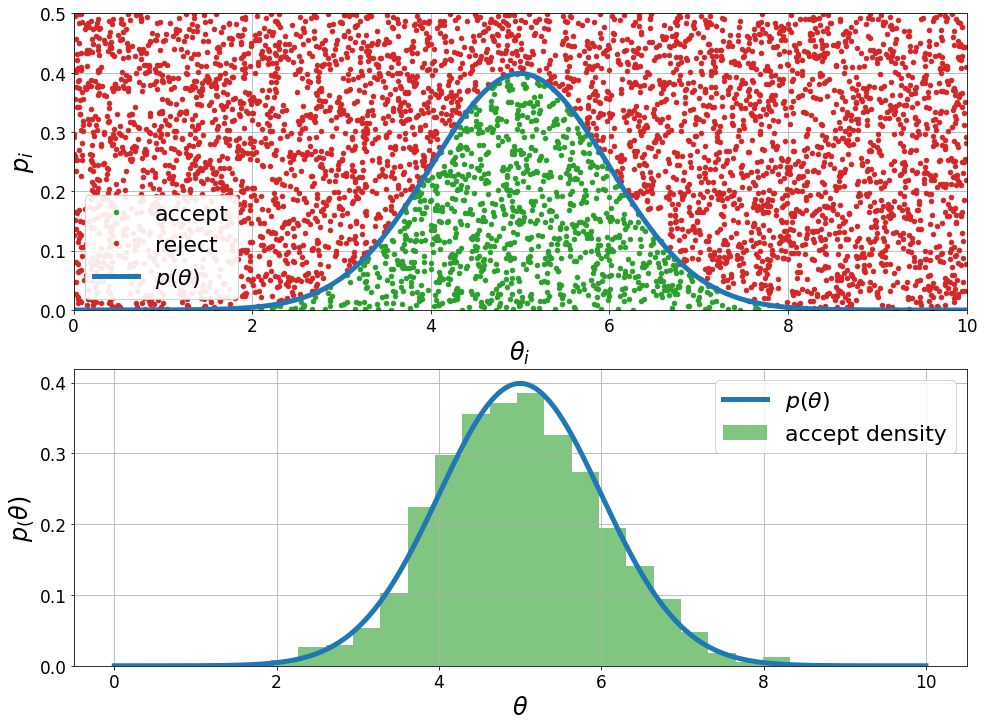

In [63]:
fig, ax = plt.subplots(nrows = 2,figsize=(16,12))
num = 800
numa = int(num/4)
ax[0].plot(accept[:,0],accept[:,1],".",color="C2",ms=9,label="accept")
ax[0].plot(reject[:,0],reject[:,1],".",color="C3",ms=9,label="reject")
ax[0].plot(thetas,gauss,lw=5,label=r"$p(\theta)$")
ax[0].set_xlim([0,10])
ax[0].set_ylim([0,0.5])

hst = ax[1].hist(accept[:,0],density=True,bins=20,color="C2",alpha=0.6,label="accept density")
ax[1].plot(thetas,gauss,lw=5,color="C0",label=r"$p(\theta)$")

ax[0].set_xlabel(r"$\theta_i$")
ax[0].set_ylabel(r"$p_i$")
ax[0].legend(framealpha=0.9)

ax[1].set_xlabel(r"$\theta$")
ax[1].set_ylabel(r"$p_(\theta)$")
ax[1].legend()

In [60]:
fig.savefig("/Users/josephbayley/projects/thesis/C2_cw/reject_sample.pdf",format="pdf",bbox_inches="tight")

# Nested sampling

In [64]:
prior = st.norm(loc=5,scale=0.8).pdf(thetas)
likelihood = st.norm(loc=6,scale=1.2).pdf(thetas)

In [76]:
lamb = 0.2

In [123]:
df = lambda a: np.sqrt(np.abs(2*1.2*1.2*np.log(np.sqrt(2*np.pi)*1.2*a)))

In [152]:
def getx(lik,mean=6):
    diff = df(lik)
    
    thetas = np.linspace(mean - diff,mean + diff,1000)
    
    pr = st.norm(loc=5,scale=0.8).pdf(thetas)
    
    area = np.trapz(pr,x=thetas,dx=thetas[1]-thetas[0])
    
    return area

In [175]:
lik =  np.linspace(0,max(likelihood),1000)

In [176]:
Xs = [getx(i) for i in lik]

/Users/josephbayley/.virtualenvs/soap/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/josephbayley/.virtualenvs/soap/lib/python3.7/site-packages/numpy/core/function_base.py:159: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/josephbayley/.virtualenvs/soap/lib/python3.7/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
/Users/josephbayley/.virtualenvs/soap/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/Users/josephbayley/.virtualenvs/soap/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


In [181]:
diff = df(0.25)

In [122]:
st.norm(loc=6,scale=1.2).pdf(4.791)

0.2001299817069133

In [104]:
thetas[6+diff > thetas > 6-diff]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

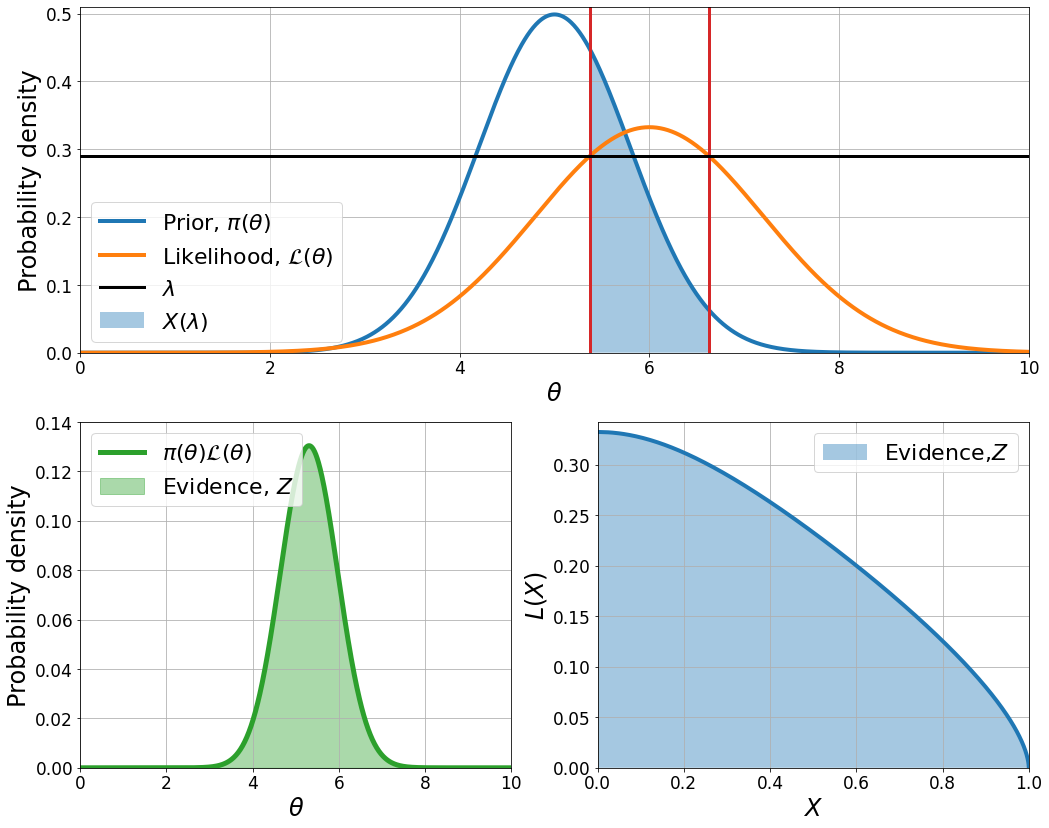

In [183]:
fig = plt.figure(figsize=(17,14))
ax1 = plt.subplot2grid((2,2), (0,0), colspan=2)
ax2 = plt.subplot2grid((2,2), (1,0))
ax3 = plt.subplot2grid((2,2), (1,1))

ax1.plot(thetas,prior,"-",lw=4,color="C0",ms=9,label=r"Prior, $\pi(\theta)$")
ax1.plot(thetas,likelihood,"-",lw=4,color="C1",ms=9,label=r"Likelihood, $\mathcal{L}(\theta)$")

lamb = 0.29
diff = df(lamb)

ax1.axvline(6+diff,color="C3",lw=3)
ax1.axvline(6-diff,color="C3",lw=3)

ax1.axhline(lamb,color="k",label=r"$\lambda$",lw=3)

thgtr = thetas[thetas > 6-diff]
thrange = thgtr[thgtr < 6+diff]

ax1.fill_between(thrange, st.norm(loc=5,scale=0.8).pdf(thrange),alpha=0.4,label=r"$X(\lambda)$")


ax1.set_xlabel(r"$\theta$")
ax1.set_ylabel(r"Probability density")
ax1.legend()

ax1.set_xlim([0,10])
ax1.set_ylim([0,0.51])

ax2.plot(thetas,prior*likelihood,lw=5,color="C2",label=r"$\pi(\theta)\mathcal{L}(\theta)$")
ax2.fill_between(thetas,prior*likelihood,color="C2",alpha = 0.4,label=r"Evidence, $Z$")

ax2.set_xlabel(r"$\theta$")
ax2.set_ylabel(r"Probability density")
ax2.legend()

ax2.set_xlim([0,10])
ax2.set_ylim([0,0.14])

ax3.plot(Xs,lik,lw=4)

ax3.fill_between(Xs,lik,alpha=0.4,label=r"Evidence,$Z$")

ax3.set_xlim([0,1])
ax3.set_ylim([0,max(lik) + 0.01])

ax3.set_xlabel(r"$X$")
ax3.set_ylabel(r"$L(X)$")
ax3.legend()

In [184]:
fig.savefig("/Users/josephbayley/projects/thesis/C2_cw/nested_plots.pdf",format="pdf",bbox_inches="tight")

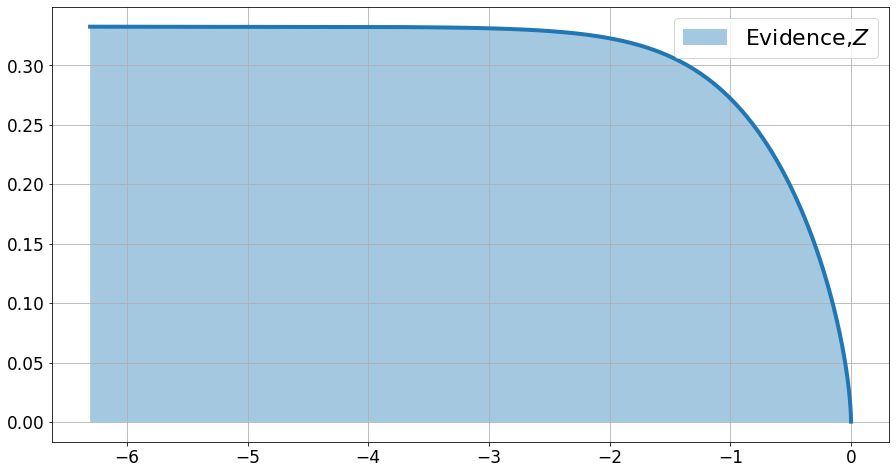

In [177]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(np.log(Xs),lik,lw=4)

ax.fill_between(np.log(Xs),lik,alpha=0.4,label=r"Evidence,$Z$")

ax.legend()